<a href="https://colab.research.google.com/github/epraichu/ai-gp-course/blob/main/lesson12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

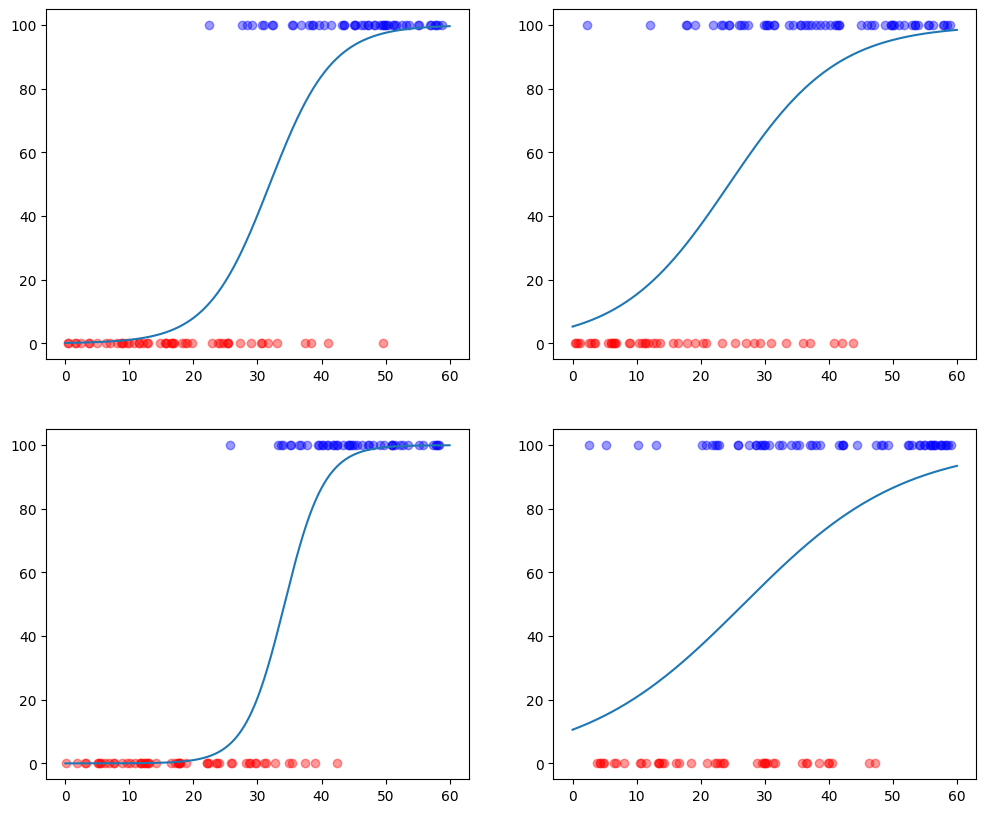

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

def generate_data(n, seed, k_true, x0_true):
  rng = np.random.default_rng(seed)
  time = rng.uniform(0, 60, n)
  true = 1 / (1 + np.exp(-k_true * (time - x0_true)))
  result = rng.binomial(1, true)
  return time, result

data = [
    {"n": 100, "seed": 1, "k_true": 0.2, "x0_true": 30, "labelName": "Zbiór 1"},
    {"n": 100, "seed": 2, "k_true": 0.15, "x0_true": 25, "labelName": "Zbiór 2"},
    {"n": 100, "seed": 3, "k_true": 0.25, "x0_true": 35, "labelName": "Zbiór 3"},
    {"n": 100, "seed": 4, "k_true": 0.1, "x0_true": 28, "labelName": "Zbiór 4"},
]

grid = np.linspace(0, 60, 500).reshape(-1, 1)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

curves = []

for i, dataSet in enumerate(data):
  time, result = generate_data(dataSet["n"], dataSet["seed"], dataSet["k_true"], dataSet["x0_true"])

  X = time.reshape(-1, 1)

  model = LogisticRegression()
  model.fit(X, result)

  predicted = model.predict_proba(grid)[:, 1] * 100
  curves.append((predicted, dataSet["labelName"]))

  axs[i].scatter(time[result == 0], result[result == 0]*100, c='red', alpha=0.4, label="Porażka (0)")
  axs[i].scatter(time[result == 1], result[result == 1]*100, c='blue', alpha=0.4, label="Sukces (1)")

  axs[i].plot(grid, predicted, label="Regresja logistyczna / szan. na zdanie")